# Clustering & PCA Assignment

Assignment: Part I

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

And this is where you come in as a data analyst.Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

The steps are broadly:

   1. Read and understand the data
   2. Clean the data
   3. Prepare the data for modelling
   4. Perform PCA on the data
   5. Modelling(K-Means and Hierarchical clustering)
   6. Final analysis and reco


# 1.Read and understand the data

In [196]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [197]:
# Reading the data
Country=pd.read_csv("C://Users//AjayPasi//Downloads//CLUSTERING_ASSIGNMENT//Country-data.csv")
Country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [198]:
# Data shape
Country.shape

(167, 10)

In [199]:
# Basic info of the df
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [200]:
Country.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

# 2.Clean the data

In [201]:
# Check the missing values
round(100*(Country.isnull().sum())/len(Country),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

As there is no missing value in the data so need to do any imputation and now we will go to Data preparation step.

# 3.Prepare the data for modelling

Data Preparation step consist of two sub-step 1.Outlier Treatment , 2.Rescaling

1.Checking Outliers:For outlier we will use Boxplots and percentile.

Text(0.5, 0, 'gdpp')

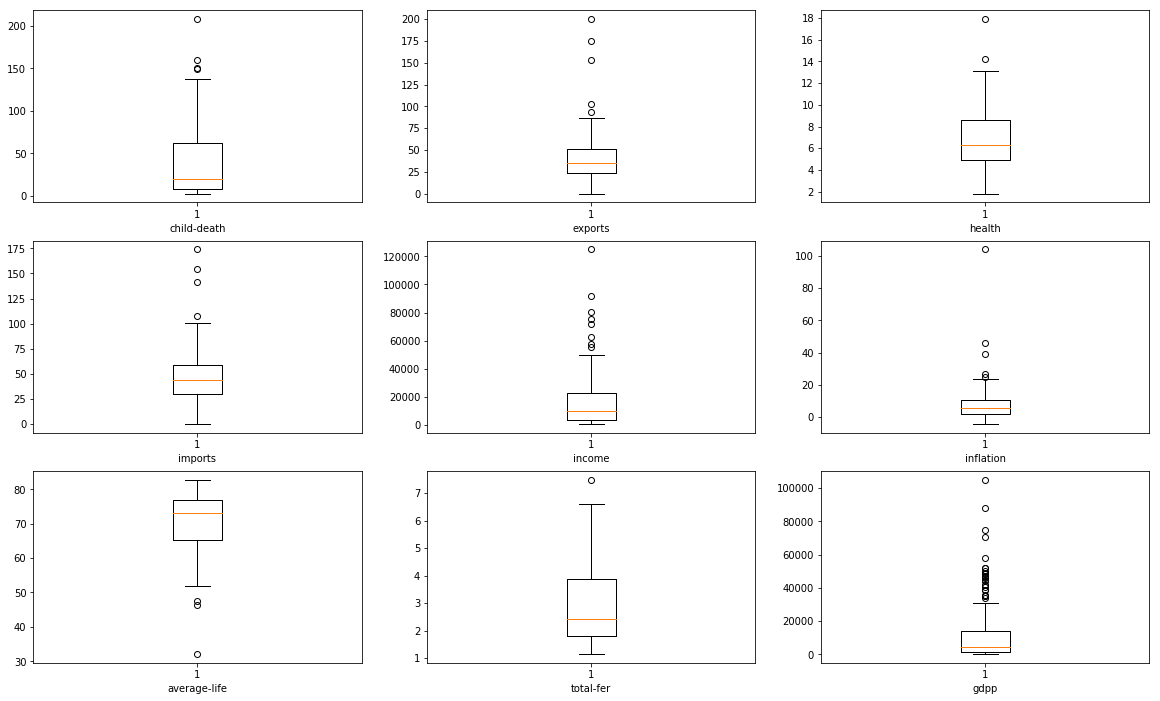

In [202]:
plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
plt.boxplot(Country['child_mort'])
plt.xlabel('child-death')

plt.subplot(3,3,2)
plt.boxplot(Country['exports'])
plt.xlabel('exports')

plt.subplot(3,3,3)
plt.boxplot(Country['health'])
plt.xlabel('health')

plt.subplot(3,3,4)
plt.boxplot(Country['imports'])
plt.xlabel('imports')

plt.subplot(3,3,5)
plt.boxplot(Country['income'])
plt.xlabel('income')

plt.subplot(3,3,6)
plt.boxplot(Country['inflation'])
plt.xlabel('inflation')

plt.subplot(3,3,7)
plt.boxplot(Country['life_expec'])
plt.xlabel('average-life')

plt.subplot(3,3,8)
plt.boxplot(Country['total_fer'])
plt.xlabel('total-fer')

plt.subplot(3,3,9)
plt.boxplot(Country['gdpp'])
plt.xlabel('gdpp')

From the above Box-plots we can observe that no outliers present in the dataframe, only few less outlier values are there which are important for further modelling.

In [203]:
# Check the percentiles of the values to find the outliers
Country.describe(percentiles=[.25,.5,.75,.90,.95,.99])

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
90%    100.220000   70.800000   10.940000   75.420000   41220.000000   
95%    116.000000   80.570000   11.570000   81.140000   48290.000000   
99%    153.400000  160.480000   13.474000  146.080000   84374.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
90%     16.640000   80.400000    5.322000   41840.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

From the above percentiles we can clearly see that few higher values are present in the dataframe , but those values are very important for clustering perspective.So, We will not remove any outlier values

2.Rescaling:We will rescale the data in our dataframe to one standard format.

In [204]:
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


# 4.Perform PCA on the data

In [205]:
#Create new df to select all the component required for PCA
Country_new=Country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

#instantiate
scaler = StandardScaler()

#fit transform
Country_scaled = scaler.fit_transform(Country_new)
Country_scaled.shape
Country_scaled[:5,:5]

array([[ 1.29153238, -1.13827979,  0.27908825, -0.08245496, -0.8082454 ],
       [-0.5389489 , -0.47965843, -0.09701618,  0.07083669, -0.3753689 ],
       [-0.27283273, -0.09912164, -0.96607302, -0.64176233, -0.22084447],
       [ 2.00780766,  0.77538117, -1.44807093, -0.16531531, -0.58504345],
       [-0.69563412,  0.1606679 , -0.28689415,  0.4975675 ,  0.10173177]])

In [206]:
# convert the array Country_scaled into a dataframe
Country_scaled = pd.DataFrame(Country_scaled)
Country_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
Country_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

In [207]:
# import the PCA library
from sklearn.decomposition import PCA

In [208]:
# create the PCA object 
pca = PCA(random_state=42)

In [209]:
# fit the df into object 
pca.fit(Country_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [210]:
# check the PCA components
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [211]:
# check the variance ratio
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Text(0.5, 0, 'cluster')

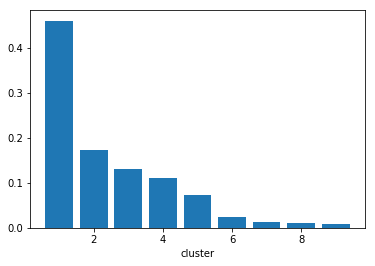

In [212]:
# plot the variance ration to better understanding
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("cluster")

In [213]:
# calculate the cumulative sum of Variance ratios
var_cumu = np.cumsum(pca.explained_variance_ratio_)

Text(0.5, 0, 'cluster')

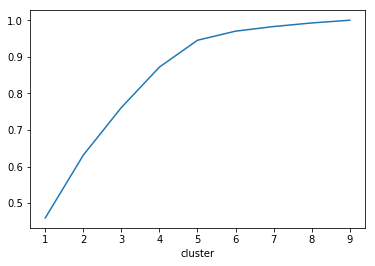

In [214]:
# plot the cumulative sum for better understandings
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.xlabel("cluster")

In [215]:
#5 principal components we have found to attain required threshold accuracy of more than 90%
# so we will created PCA of 5 components
pc5 = PCA(n_components=5, random_state=42)

In [216]:
# fit the scaled df into the new PCA object of components 5
newdata = pc5.fit_transform(Country_scaled)

# 5.Modelling 

# 5.(A) K-Means clustering

In [217]:
# check the new df shape 
newdata.shape

(167, 5)

In [218]:
# assign the columns name 
Country_PCA = pd.DataFrame(newdata, columns=["PC1", "PC2","PC3","PC4","PC5"])
Country_PCA.head()

PC1       PC2       PC3       PC4       PC5
0 -2.913025  0.095621 -0.718118  1.005255 -0.158310
1  0.429911 -0.588156 -0.333486 -1.161059  0.174677
2 -0.285225 -0.455174  1.221505 -0.868115  0.156475
3 -2.932423  1.695555  1.525044  0.839625 -0.273209
4  1.033576  0.136659 -0.225721 -0.847063 -0.193007

In [219]:
# final model with k=5
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(Country_PCA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [220]:
kmeans.labels_

array([1, 2, 3, 1, 2, 3, 3, 0, 0, 3, 2, 2, 3, 2, 2, 0, 2, 1, 2, 3, 2, 1,
       3, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 3, 3, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 3, 3, 3, 2, 1, 1, 2, 2, 0, 0, 3, 1, 2, 0, 1, 0, 2, 3, 1, 1, 2,
       1, 2, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 2, 3, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 3, 2, 4, 2, 1, 1, 2, 2, 1, 4, 1, 2, 2, 2, 3, 2, 3, 1, 3, 1, 3,
       0, 0, 1, 1, 0, 3, 1, 2, 2, 3, 3, 2, 0, 0, 3, 3, 1, 3, 3, 1, 2, 2,
       1, 4, 2, 2, 2, 1, 2, 0, 3, 3, 1, 2, 0, 0, 3, 1, 2, 1, 1, 3, 2, 3,
       3, 1, 2, 0, 0, 0, 3, 3, 3, 3, 2, 1, 1])

In [221]:
# assign the labels
Country['cluster_id']=kmeans.labels_
Country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster_id  
0       9.44        56.2       5.82    553           1  
1       4.49        76.3       1.65   4090           2  
2      16.10        76.5       2.89   4460           3  
3      22.40        60.1       6.16   3530           1  
4       1.44        76.8       2.13  12200           2

Plot the different different components of the dataframe against cluster_id for better visualisations and analysis.

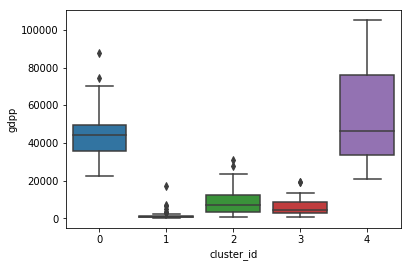

In [222]:
# plot the gdpp variable with cluster_id
#plt.figure(figsize=(30,18))
sns.boxplot(x='cluster_id', y='gdpp', data=Country)

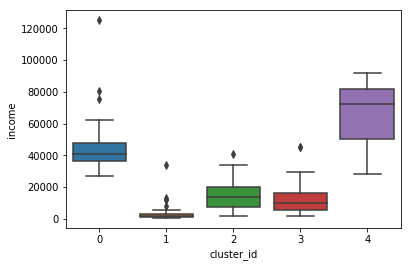

In [223]:
# plot the income variable with cluster_id
#plt.figure(figsize=(30,18))
sns.boxplot(x='cluster_id', y='income', data=Country)

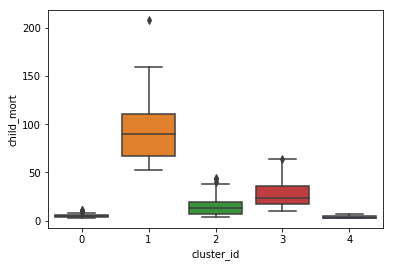

In [224]:
# plot the child_mort variable with cluster_id
#plt.figure(figsize=(30,18))
sns.boxplot(x='cluster_id', y='child_mort', data=Country)

As we have 5 clusters formed , So now we will make 5 different df of each cluster to plot and analyse differents components within separately that to choose the cluster which need direct aid from NGO

In [225]:
# First cluster with cluster_id = 0

cluster_0=Country[Country['cluster_id']==0]
cluster_0.head()

country  child_mort  exports  health  imports  income  inflation  \
7   Australia         4.8     19.8    8.73     20.9   41400      1.160   
8     Austria         4.3     51.3   11.00     47.8   43200      0.873   
15    Belgium         4.5     76.4   10.70     74.7   41100      1.880   
23     Brunei        10.5     67.4    2.84     28.0   80600     16.700   
29     Canada         5.6     29.1   11.30     31.0   40700      2.870   

    life_expec  total_fer   gdpp  cluster_id  
7         82.0       1.93  51900           0  
8         80.5       1.44  46900           0  
15        80.0       1.86  44400           0  
23        77.1       1.84  35300           0  
29        81.3       1.63  47400           0

In [226]:
cluster_0.shape

(27, 11)

In [227]:
# Second cluster with cluster_id = 1

cluster_1=Country[Country['cluster_id']==1]
cluster_1.head()

country  child_mort  exports  health  imports  income  inflation  \
0    Afghanistan        90.2     10.0    7.58     44.9    1610      9.440   
3         Angola       119.0     62.3    2.85     42.9    5900     22.400   
17         Benin       111.0     23.8    4.10     37.2    1820      0.885   
21      Botswana        52.5     43.6    8.30     51.3   13300      8.920   
25  Burkina Faso       116.0     19.2    6.74     29.6    1430      6.810   

    life_expec  total_fer  gdpp  cluster_id  
0         56.2       5.82   553           1  
3         60.1       6.16  3530           1  
17        61.8       5.36   758           1  
21        57.1       2.88  6350           1  
25        57.9       5.87   575           1

In [228]:
cluster_1.shape

(45, 11)

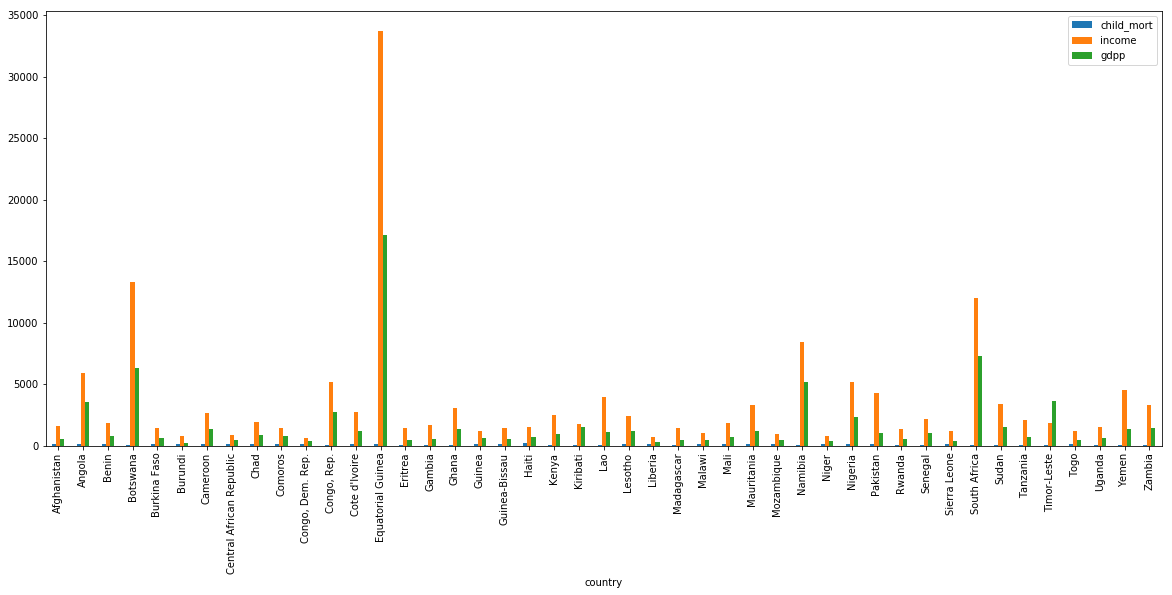

In [229]:
# analyse cluster 1 based on three variable:gdpp,income,child
cluster_1.plot(x='country', y=['child_mort','income','gdpp'], kind='bar',figsize=(20,8))

Text(0.5, 0, 'gdpp')

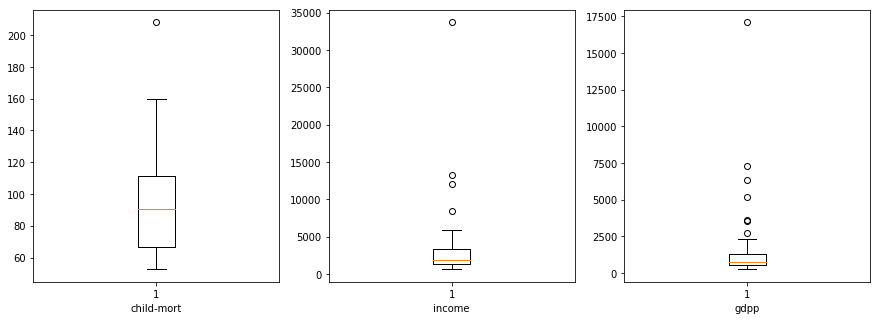

In [230]:
# Analysis throuth boxplot
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(cluster_1['child_mort'])
plt.xlabel('child-mort')

plt.subplot(1,3,2)
plt.boxplot(cluster_1['income'])
plt.xlabel('income')

plt.subplot(1,3,3)
plt.boxplot(cluster_1['gdpp'])
plt.xlabel('gdpp')

In [231]:
# Third cluster with cluster_id = 2

cluster_2=Country[Country['cluster_id']==2]
cluster_2.head()

country  child_mort  exports  health  imports  income  \
1               Albania        16.6     28.0    6.55     48.6    9930   
4   Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
10              Bahamas        13.8     35.0    7.89     43.7   22900   
11              Bahrain         8.6     69.5    4.97     50.9   41100   
13             Barbados        14.2     39.5    7.97     48.7   15300   

    inflation  life_expec  total_fer   gdpp  cluster_id  
1       4.490        76.3       1.65   4090           2  
4       1.440        76.8       2.13  12200           2  
10     -0.393        73.8       1.86  28000           2  
11      7.440        76.0       2.16  20700           2  
13      0.321        76.7       1.78  16000           2

In [232]:
cluster_2.shape

(50, 11)

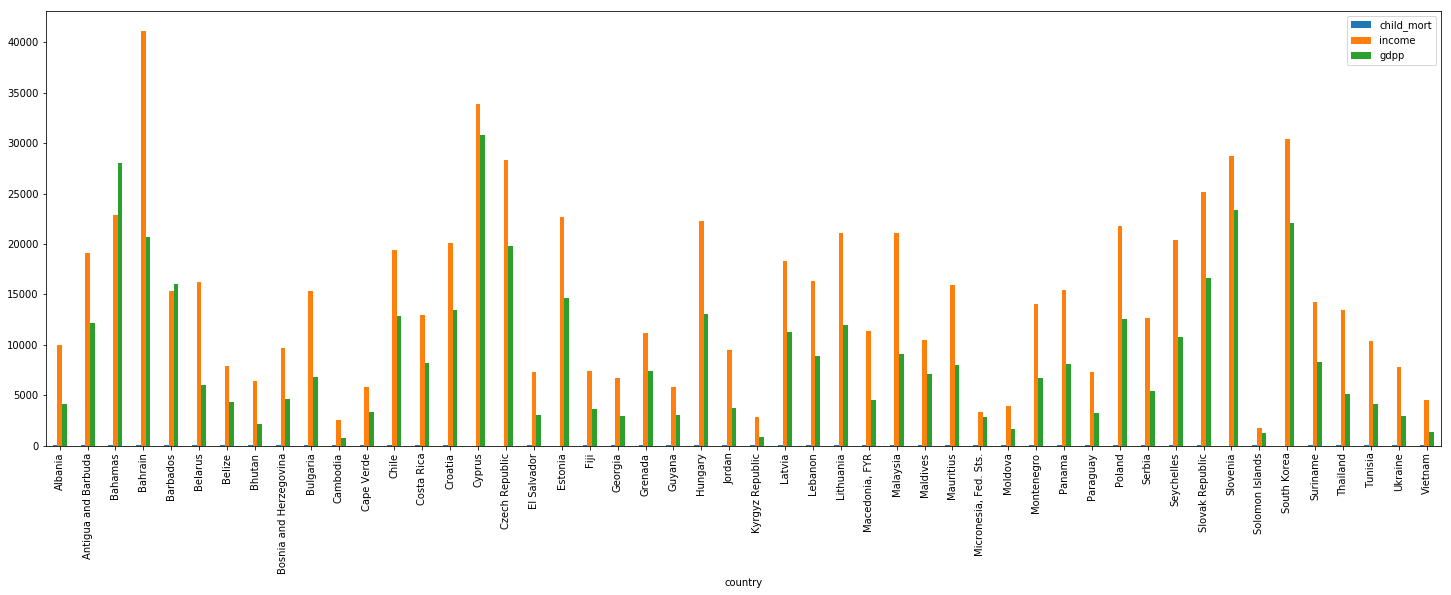

In [233]:
# analyse cluster 2 based on three variable:gdpp,income,child
cluster_2.plot(x='country', y=['child_mort','income','gdpp'], kind='bar',figsize=(25,8))

Text(0.5, 0, 'gdpp')

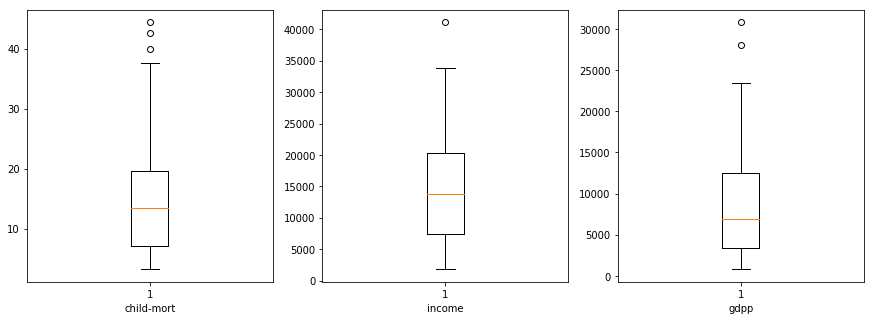

In [234]:
# Analysis throuth boxplot
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(cluster_2['child_mort'])
plt.xlabel('child-mort')

plt.subplot(1,3,2)
plt.boxplot(cluster_2['income'])
plt.xlabel('income')

plt.subplot(1,3,3)
plt.boxplot(cluster_2['gdpp'])
plt.xlabel('gdpp')

In [235]:
# Fourth cluster with cluster_id = 3
cluster_3=Country[Country['cluster_id']==3]
cluster_3.head()

country  child_mort  exports  health  imports  income  inflation  \
2      Algeria        27.3     38.4    4.17     31.4   12900      16.10   
5    Argentina        14.5     18.9    8.10     16.0   18700      20.90   
6      Armenia        18.1     20.8    4.40     45.3    6700       7.77   
9   Azerbaijan        39.2     54.3    5.88     20.7   16000      13.80   
12  Bangladesh        49.4     16.0    3.52     21.8    2440       7.14   

    life_expec  total_fer   gdpp  cluster_id  
2         76.5       2.89   4460           3  
5         75.8       2.37  10300           3  
6         73.3       1.69   3220           3  
9         69.1       1.92   5840           3  
12        70.4       2.33    758           3

In [236]:
cluster_3.shape

(42, 11)

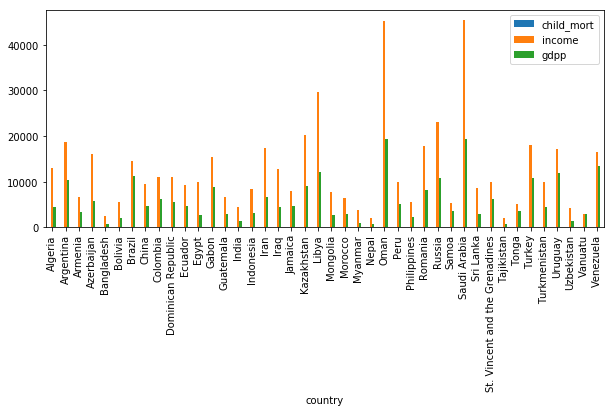

In [237]:
# analyse cluster 3 based on three variable:gdpp,income,child
cluster_3.plot(x='country', y=['child_mort','income','gdpp'], kind='bar',figsize=(10,4))

Text(0.5, 0, 'gdpp')

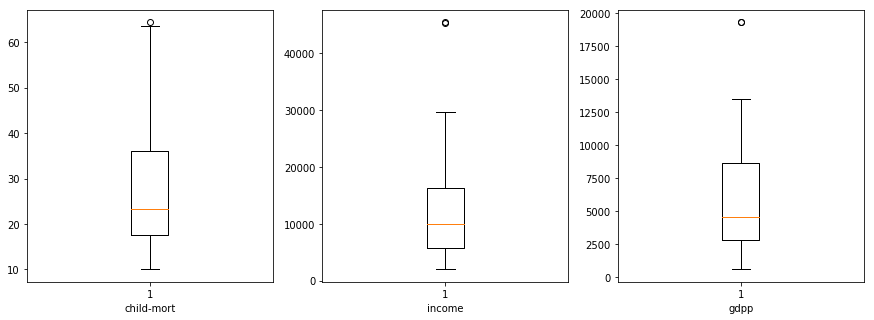

In [238]:
# Analysis throuth boxplot
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(cluster_3['child_mort'])
plt.xlabel('child-mort')

plt.subplot(1,3,2)
plt.boxplot(cluster_3['income'])
plt.xlabel('income')

plt.subplot(1,3,3)
plt.boxplot(cluster_3['gdpp'])
plt.xlabel('gdpp')

In [239]:
# Fifth cluster with cluster_id = 4

cluster_4=Country[Country['cluster_id']==4]
cluster_4.head()

country  child_mort  exports  health  imports  income  inflation  \
91   Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
98        Malta         6.8    153.0    8.65    154.0   28300      3.830   
133   Singapore         2.8    200.0    3.96    174.0   72100     -0.046   

     life_expec  total_fer    gdpp  cluster_id  
91         81.3       1.63  105000           4  
98         80.3       1.36   21100           4  
133        82.7       1.15   46600           4

In [240]:
cluster_4.shape

(3, 11)

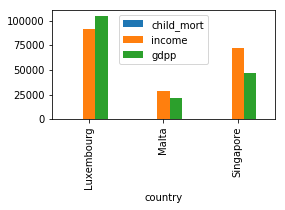

In [241]:
# analyse cluster 4 based on three variable:gdpp,income,child
cluster_4.plot(x='country', y=['child_mort','income','gdpp'], kind='bar',figsize=(4,2))

After plotting and analysing above all 5 cluster we observed that cluster_0 and cluster_2 needs direct aid from NGO, but gdpp and income of countries in cluster_2 are less as compare to cluster_0 also cluster_2 have highest child_mort rate,So we will choose cluster_2 here. 

In [242]:
#Concating country in Country_PCA dataframe

Count=Country['country']
Country_PCA_1=pd.concat([Country_PCA,Count], axis=1)
Country_PCA_1.head()

PC1       PC2       PC3       PC4       PC5              country
0 -2.913025  0.095621 -0.718118  1.005255 -0.158310          Afghanistan
1  0.429911 -0.588156 -0.333486 -1.161059  0.174677              Albania
2 -0.285225 -0.455174  1.221505 -0.868115  0.156475              Algeria
3 -2.932423  1.695555  1.525044  0.839625 -0.273209               Angola
4  1.033576  0.136659 -0.225721 -0.847063 -0.193007  Antigua and Barbuda

In [243]:
#Concating cluster_id in Country_PCA_1 dataframe 

cluster=Country['cluster_id']
Country_final_PCA=pd.concat([Country_PCA_1,cluster], axis=1)
Country_final_PCA.head()

PC1       PC2       PC3       PC4       PC5              country  \
0 -2.913025  0.095621 -0.718118  1.005255 -0.158310          Afghanistan   
1  0.429911 -0.588156 -0.333486 -1.161059  0.174677              Albania   
2 -0.285225 -0.455174  1.221505 -0.868115  0.156475              Algeria   
3 -2.932423  1.695555  1.525044  0.839625 -0.273209               Angola   
4  1.033576  0.136659 -0.225721 -0.847063 -0.193007  Antigua and Barbuda   

   cluster_id  
0           1  
1           2  
2           3  
3           1  
4           2

We wil now perform visualisations on the clusters that have been formed.We will do this by choosing the first two Principal Components (on the X-Y axes) and plotting a scatter plot of all the countries and differentiating the clusters. 

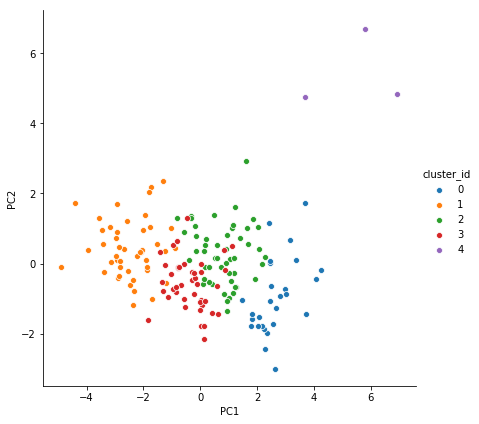

In [244]:
#plotting the first two components on the X-Y axis 
sns.pairplot(data=Country_final_PCA, x_vars=["PC1"], y_vars=["PC2"], hue = "cluster_id", size=6)

plotting the other components of the PCA performed df on the X-Y axis.

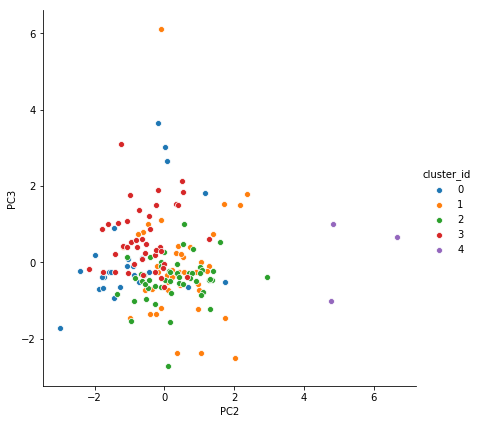

In [245]:
#plotting PC2 AND PC3 components on the X-Y axis

sns.pairplot(data=Country_final_PCA, x_vars=["PC2"], y_vars=["PC3"], hue = "cluster_id", size=6)

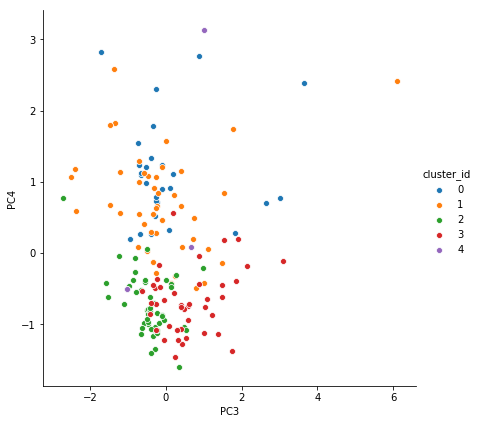

In [246]:
#plotting PC3 AND PC4 components on the X-Y axis

sns.pairplot(data=Country_final_PCA, x_vars=["PC3"], y_vars=["PC4"], hue = "cluster_id", size=6)

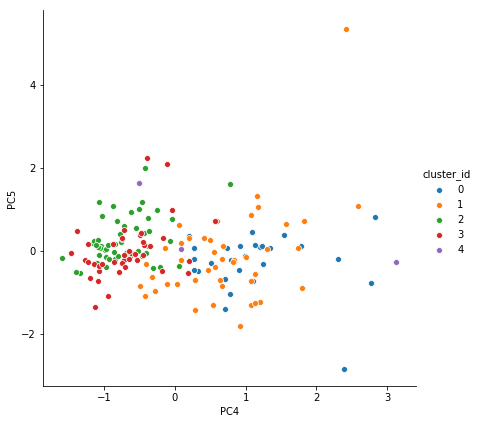

In [247]:
#plotting PC4 AND PC5 components on the X-Y axis

sns.pairplot(data=Country_final_PCA, x_vars=["PC4"], y_vars=["PC5"], hue = "cluster_id", size=6)

In [248]:
# Original df Country 
Country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster_id  
0       9.44        56.2       5.82    553           1  
1       4.49        76.3       1.65   4090           2  
2      16.10        76.5       2.89   4460           3  
3      22.40        60.1       6.16   3530           1  
4       1.44        76.8       2.13  12200           2

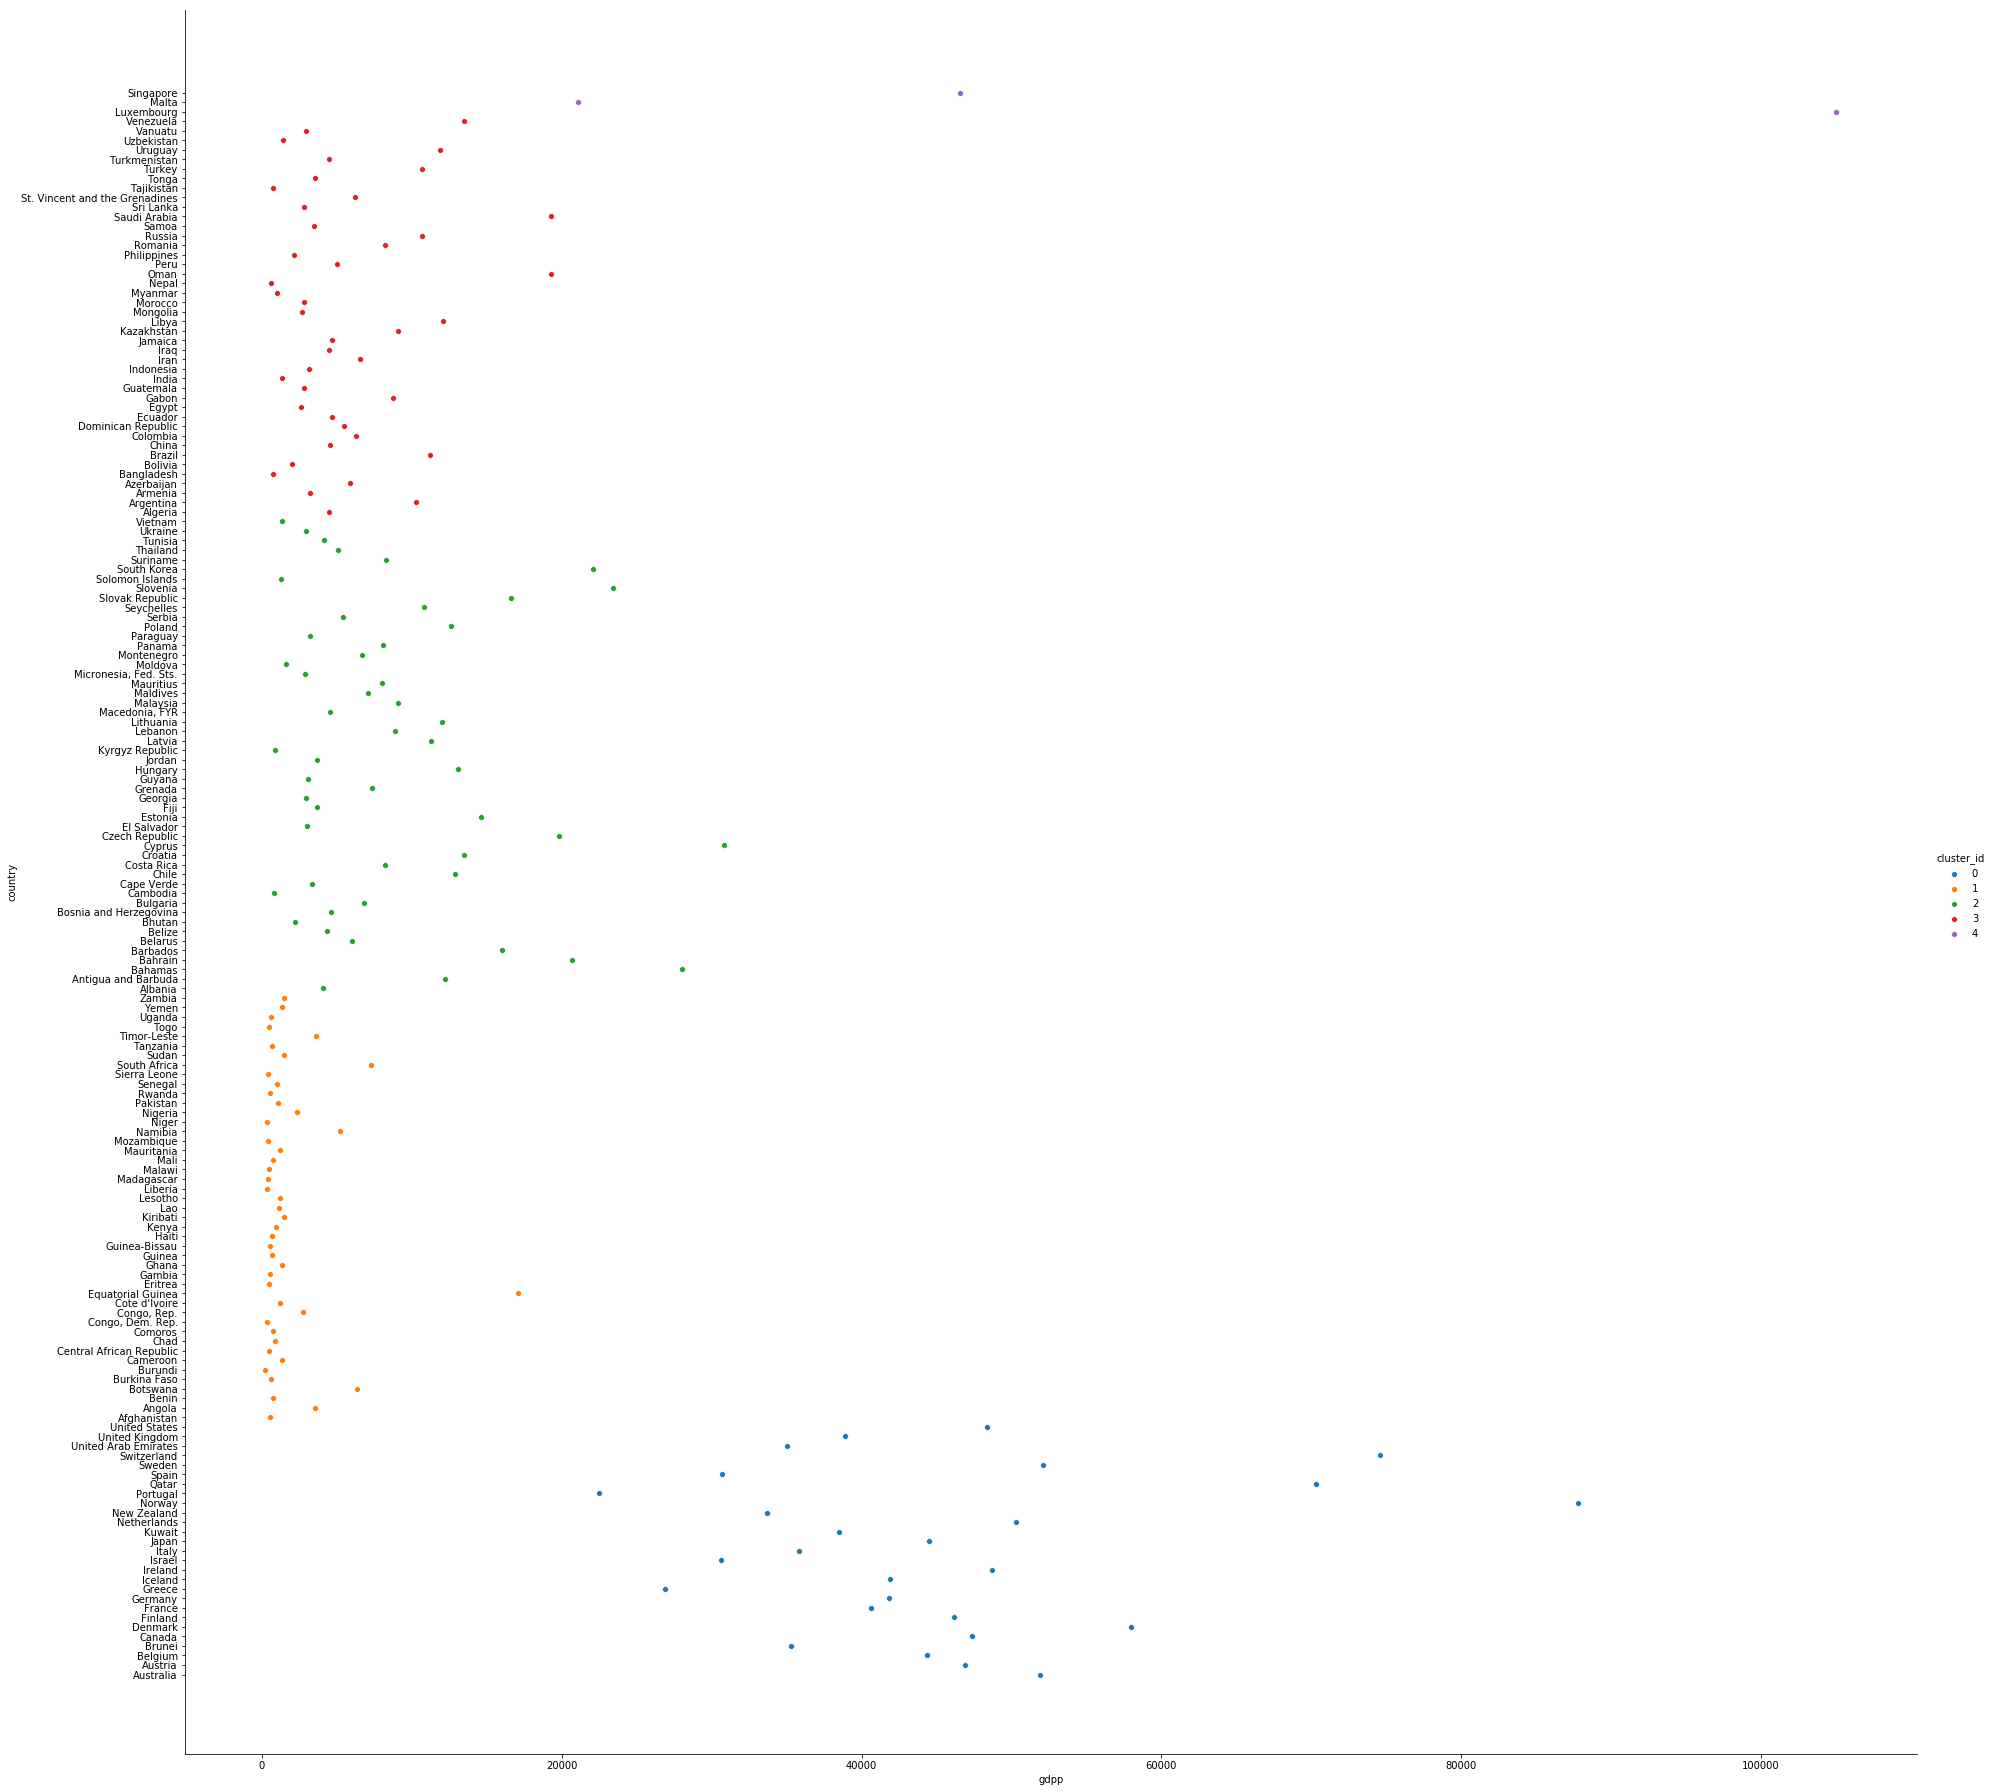

In [249]:
#plotting the gdpp and country from the original variable on X-Y axis.
sns.pairplot(data=Country, x_vars=["gdpp"], y_vars=["country"], hue = "cluster_id",size=25)

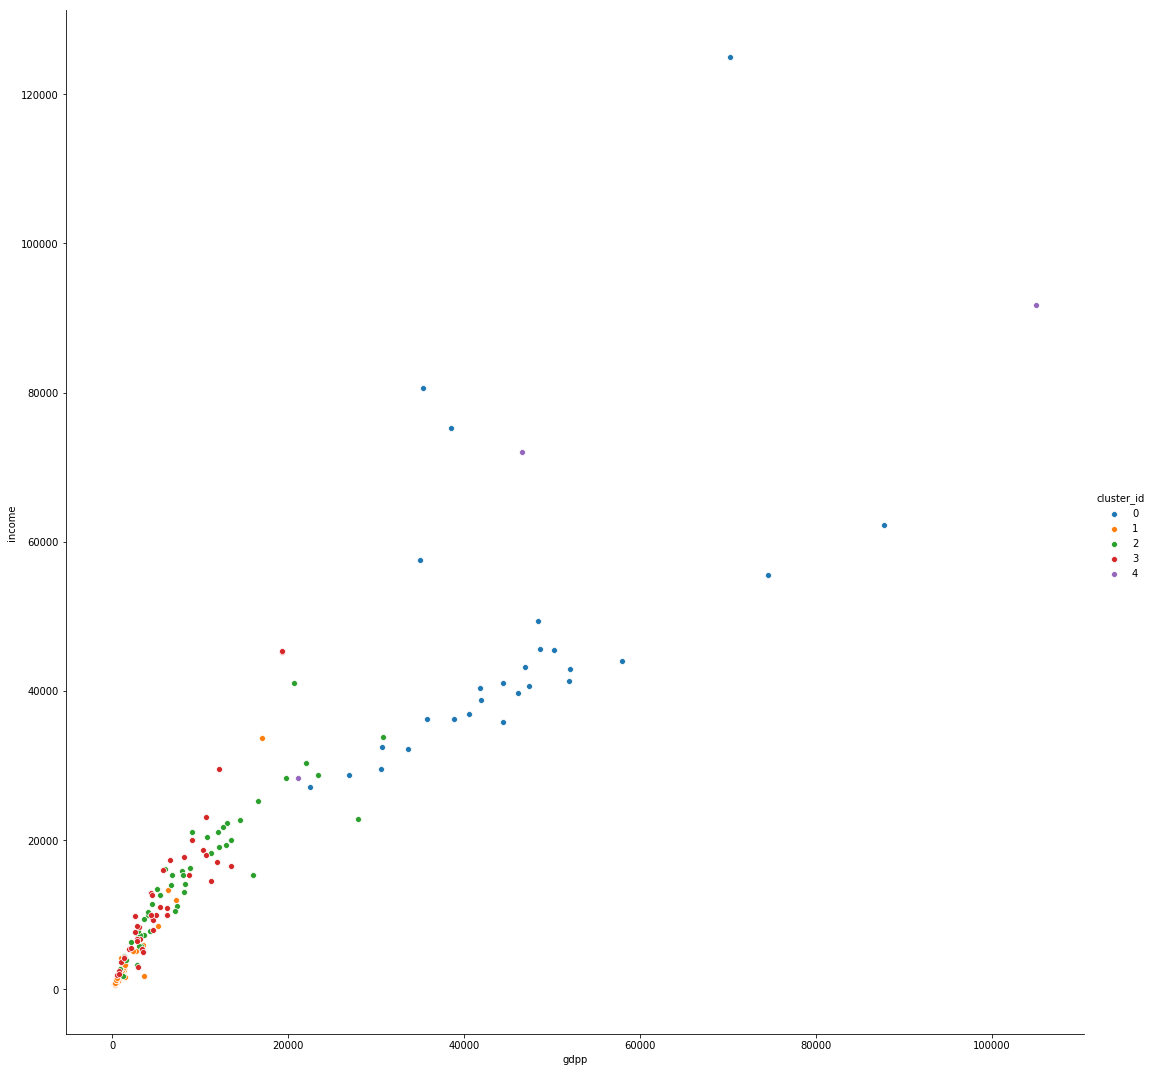

In [250]:
#plotting the gdpp and country from the original variable on X-Y axis.
sns.pairplot(data=Country, x_vars=["gdpp"], y_vars=["income"], hue = "cluster_id",size=15)

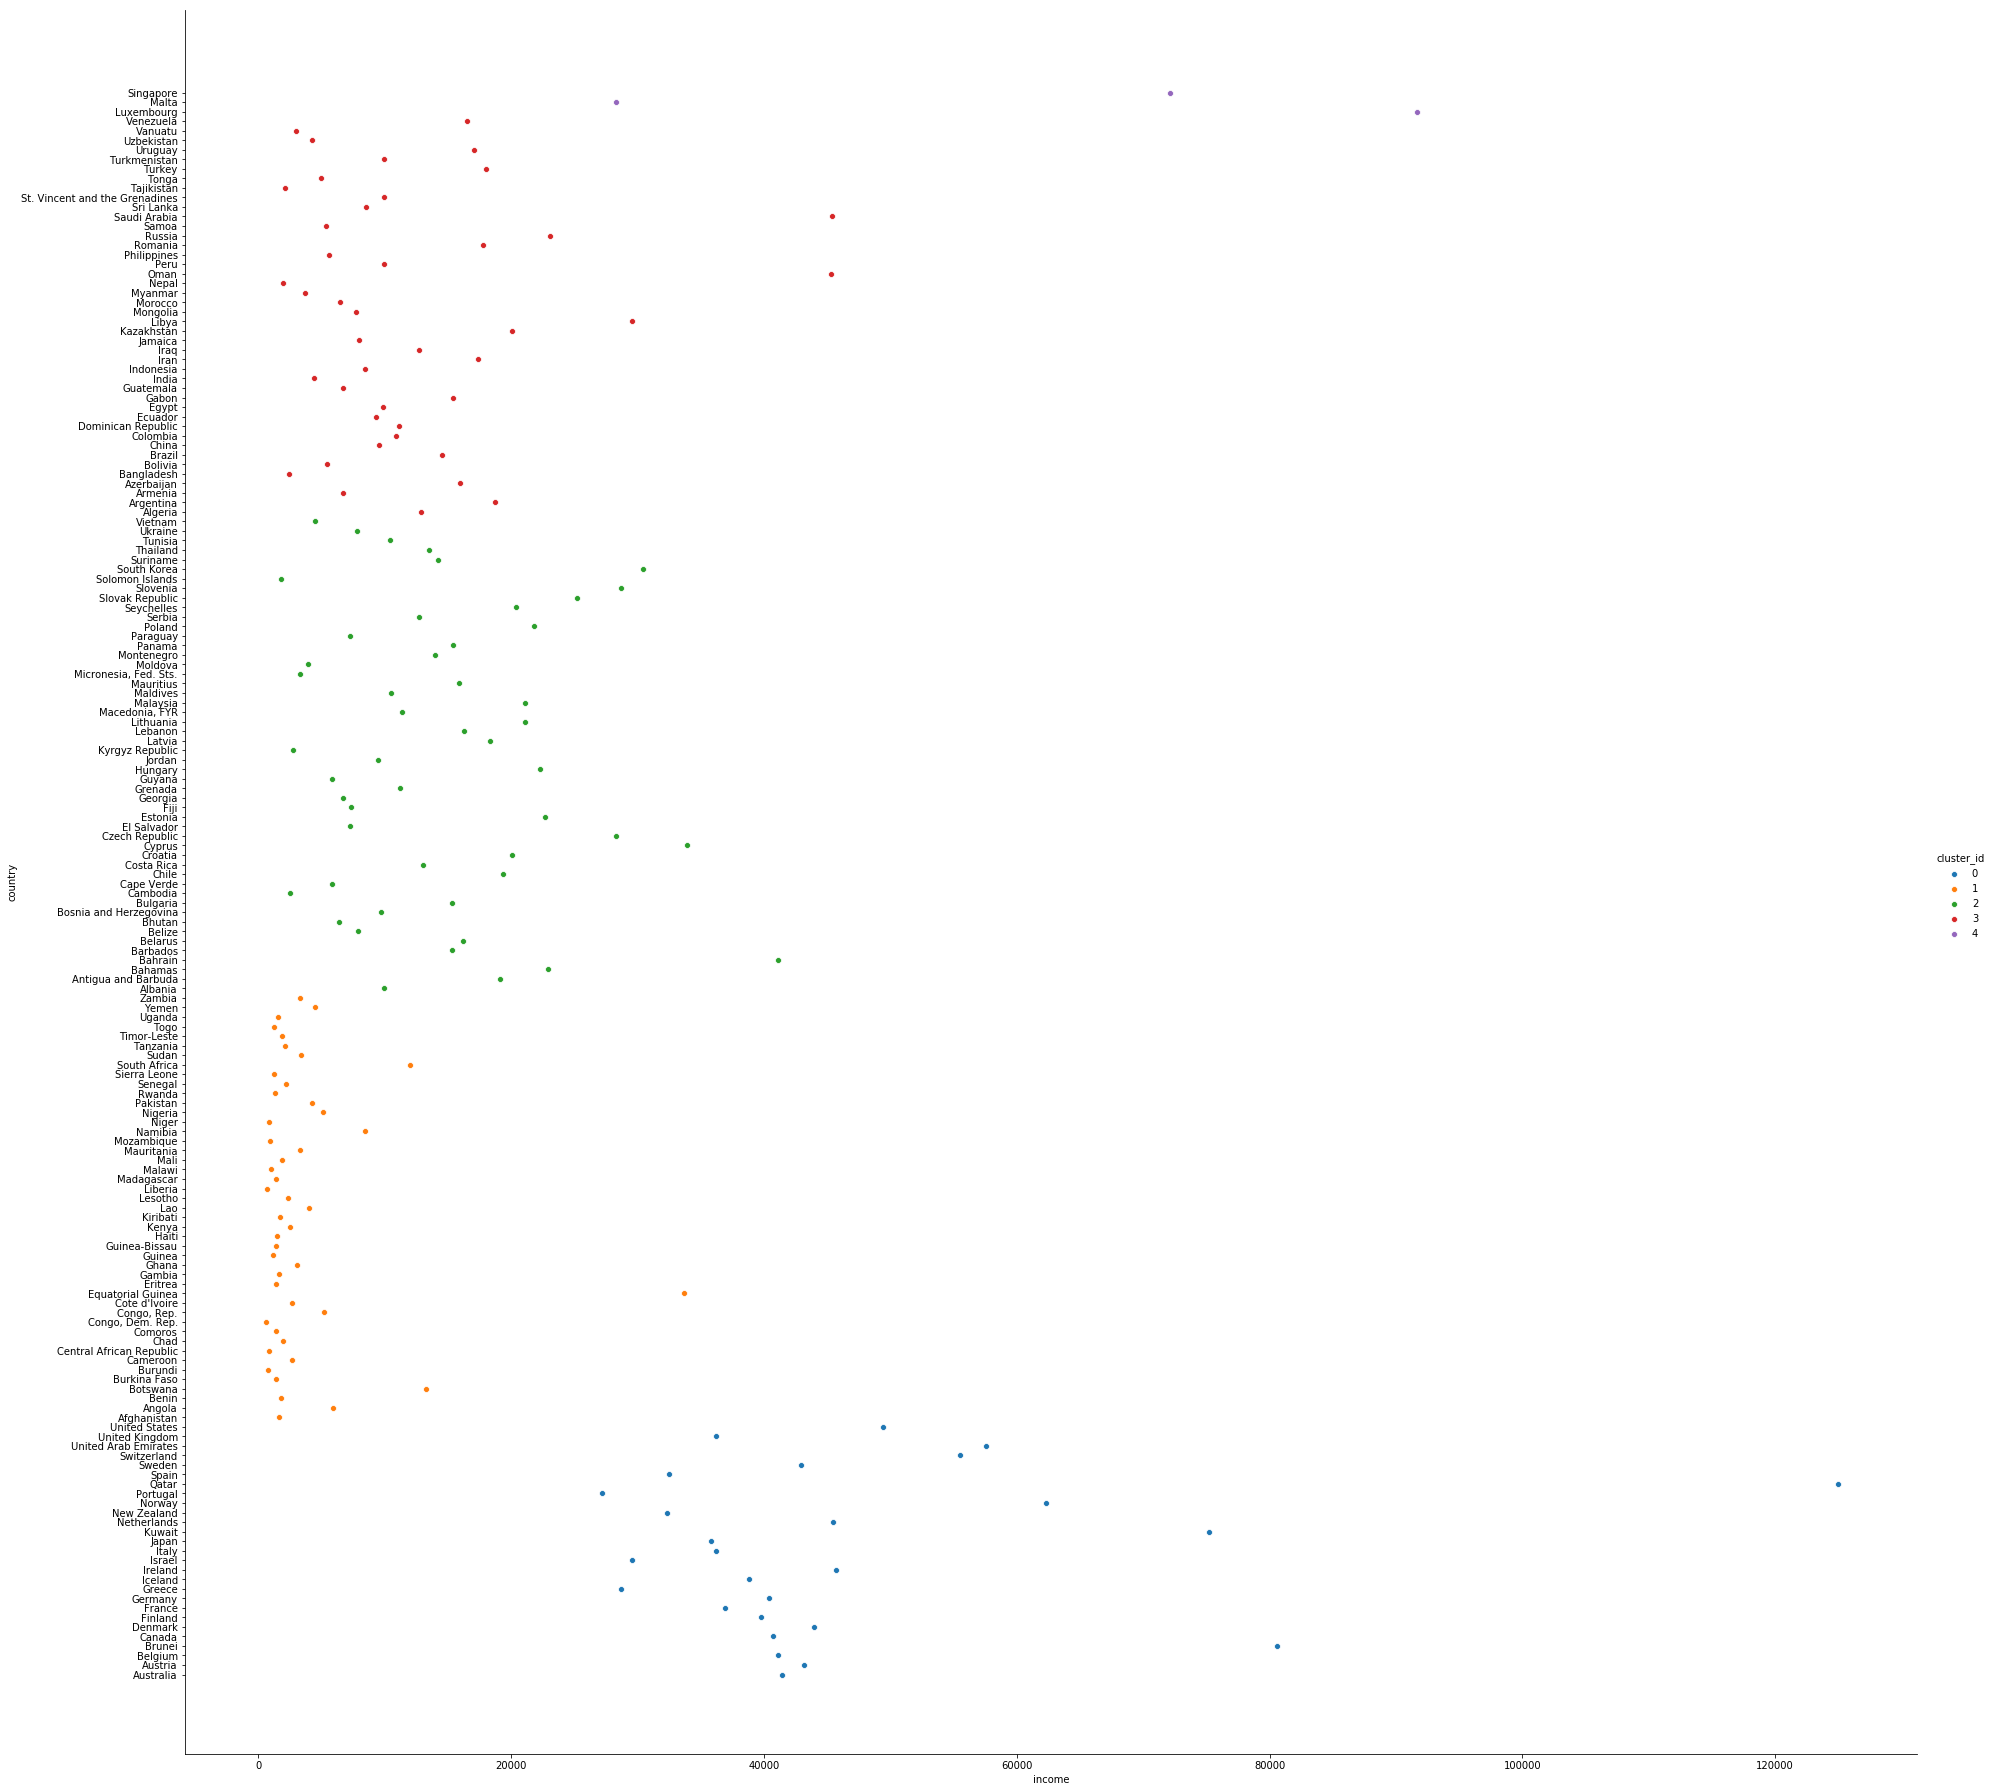

In [251]:
#plotting the income and country from the original variable on X-Y axis.
sns.pairplot(data=Country, x_vars=["income"], y_vars=["country"], hue = "cluster_id",size=25)

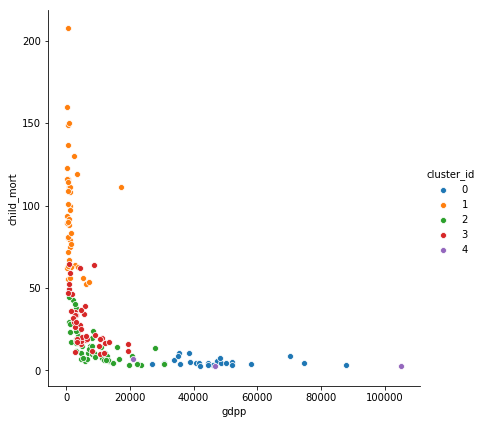

In [252]:
#plotting the gdpp and child_mort from the original variable on X-Y axis.
sns.pairplot(data=Country, x_vars=["gdpp"], y_vars=["child_mort"], hue = "cluster_id",size=6)

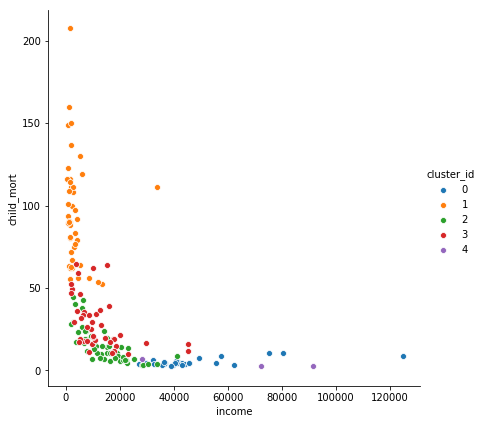

In [253]:
#plotting the income and child_mort from the original variable on X-Y axis.
sns.pairplot(data=Country, x_vars=["income"], y_vars=["child_mort"], hue = "cluster_id",size=6)

# 5.(B) Hierarchical Clustering

In [254]:
# Scaled df 
Country_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

In [255]:
# Original df
Country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster_id  
0       9.44        56.2       5.82    553           1  
1       4.49        76.3       1.65   4090           2  
2      16.10        76.5       2.89   4460           3  
3      22.40        60.1       6.16   3530           1  
4       1.44        76.8       2.13  12200           2

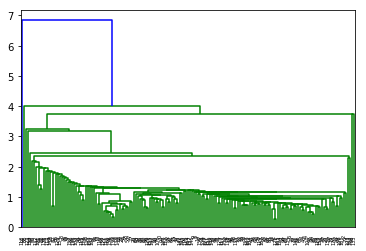

In [256]:
# single linkage
mergings = linkage(Country_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()


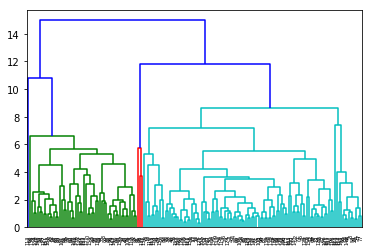

In [257]:
# complete linkage
mergings = linkage(Country_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [258]:
# 5 clusters
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 3, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0])

In [259]:
# assign cluster labels in the original df Country
Country['cluster_labels'] = cluster_labels
Country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster_id  cluster_labels  
0       9.44        56.2       5.82    553           1               0  
1       4.49        76.3       1.65   4090           2               1  
2      16.10        76.5       2.89   4460           3               1  
3      22.40        60.1       6.16   3530           1               0  
4       1.44        76.8       2.13  12200           2               1

Plot the different different components of the dataframe against cluster_labels for better visualisations and analysis.

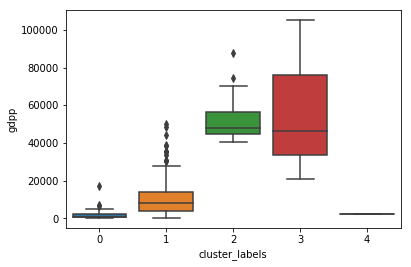

In [260]:
# plot gdpp against cluster_labels
sns.boxplot(x='cluster_labels', y='gdpp', data=Country)

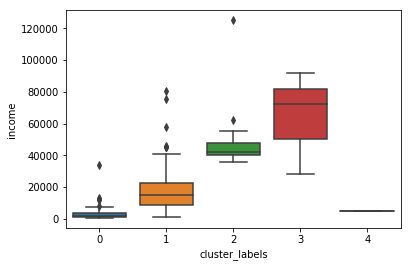

In [261]:
# plot income against cluster_labels
sns.boxplot(x='cluster_labels', y='income', data=Country)

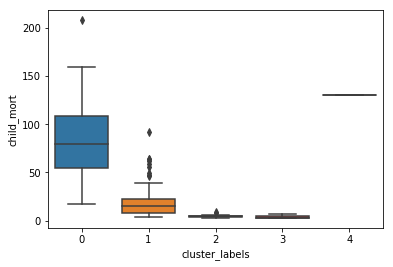

In [262]:
# plot child_mort against cluster_labels
sns.boxplot(x='cluster_labels', y='child_mort', data=Country)

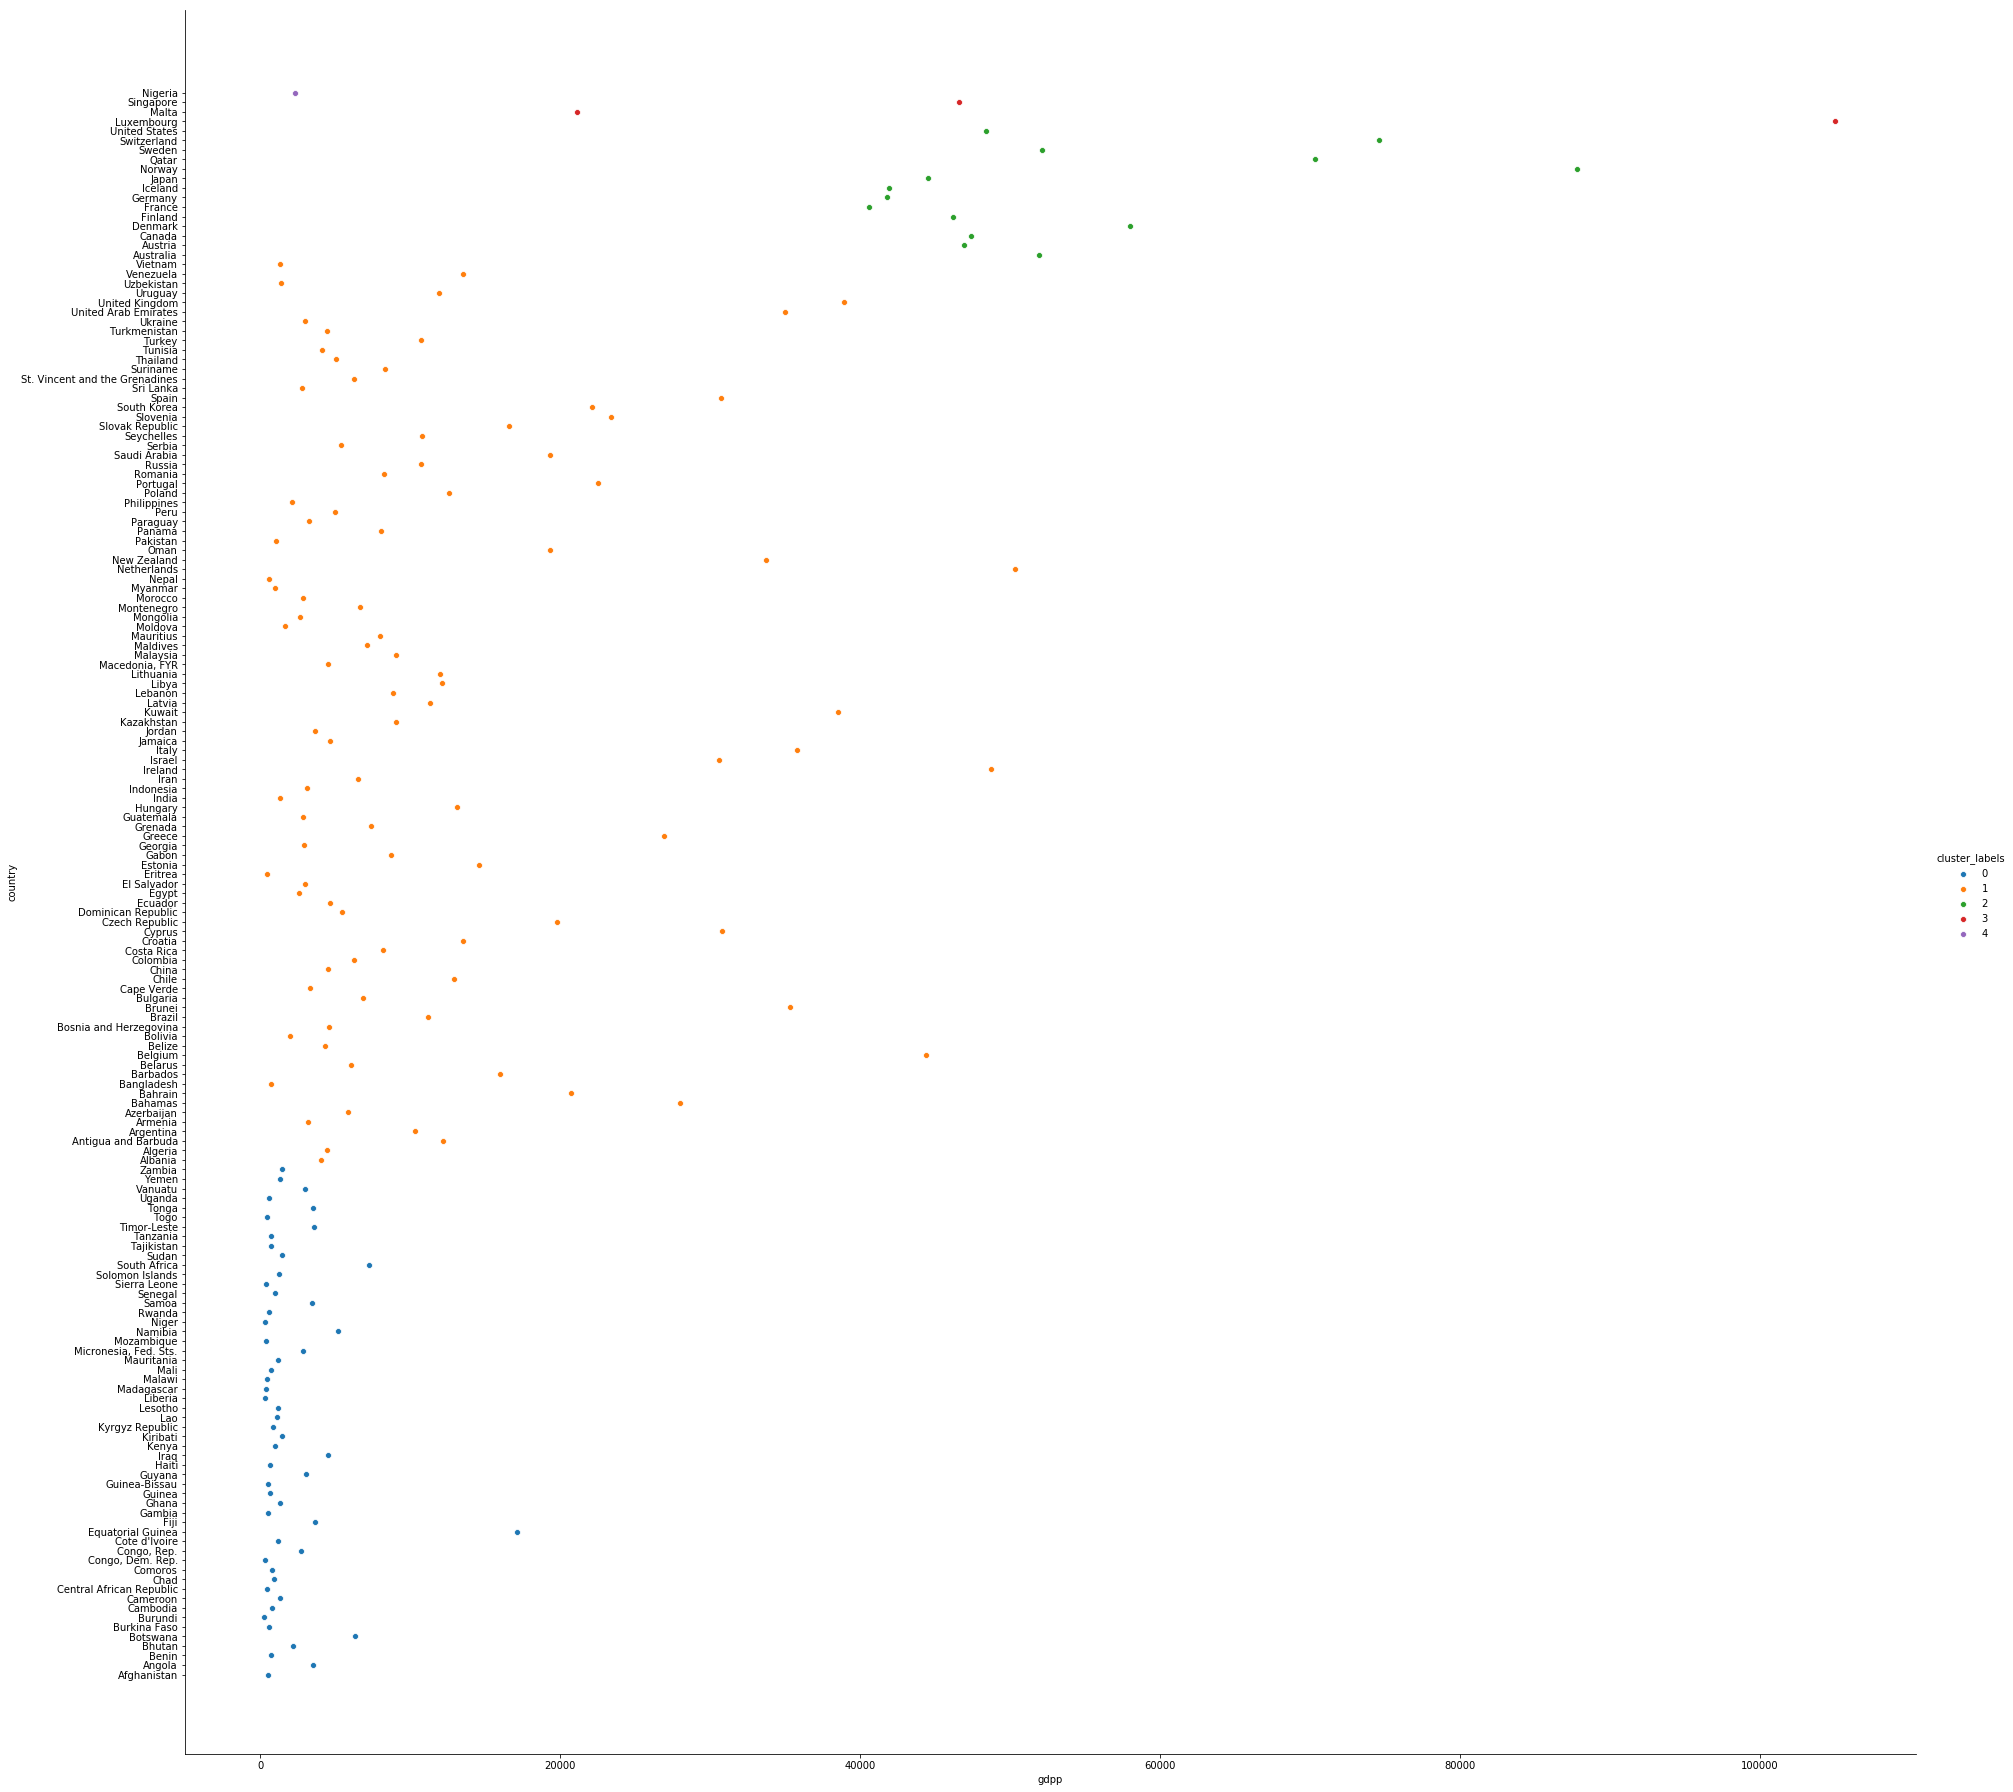

In [263]:
#plotting the gdpp and country  on X-Y axis.
sns.pairplot(data=Country, x_vars=["gdpp"], y_vars=["country"], hue = "cluster_labels",size=25)

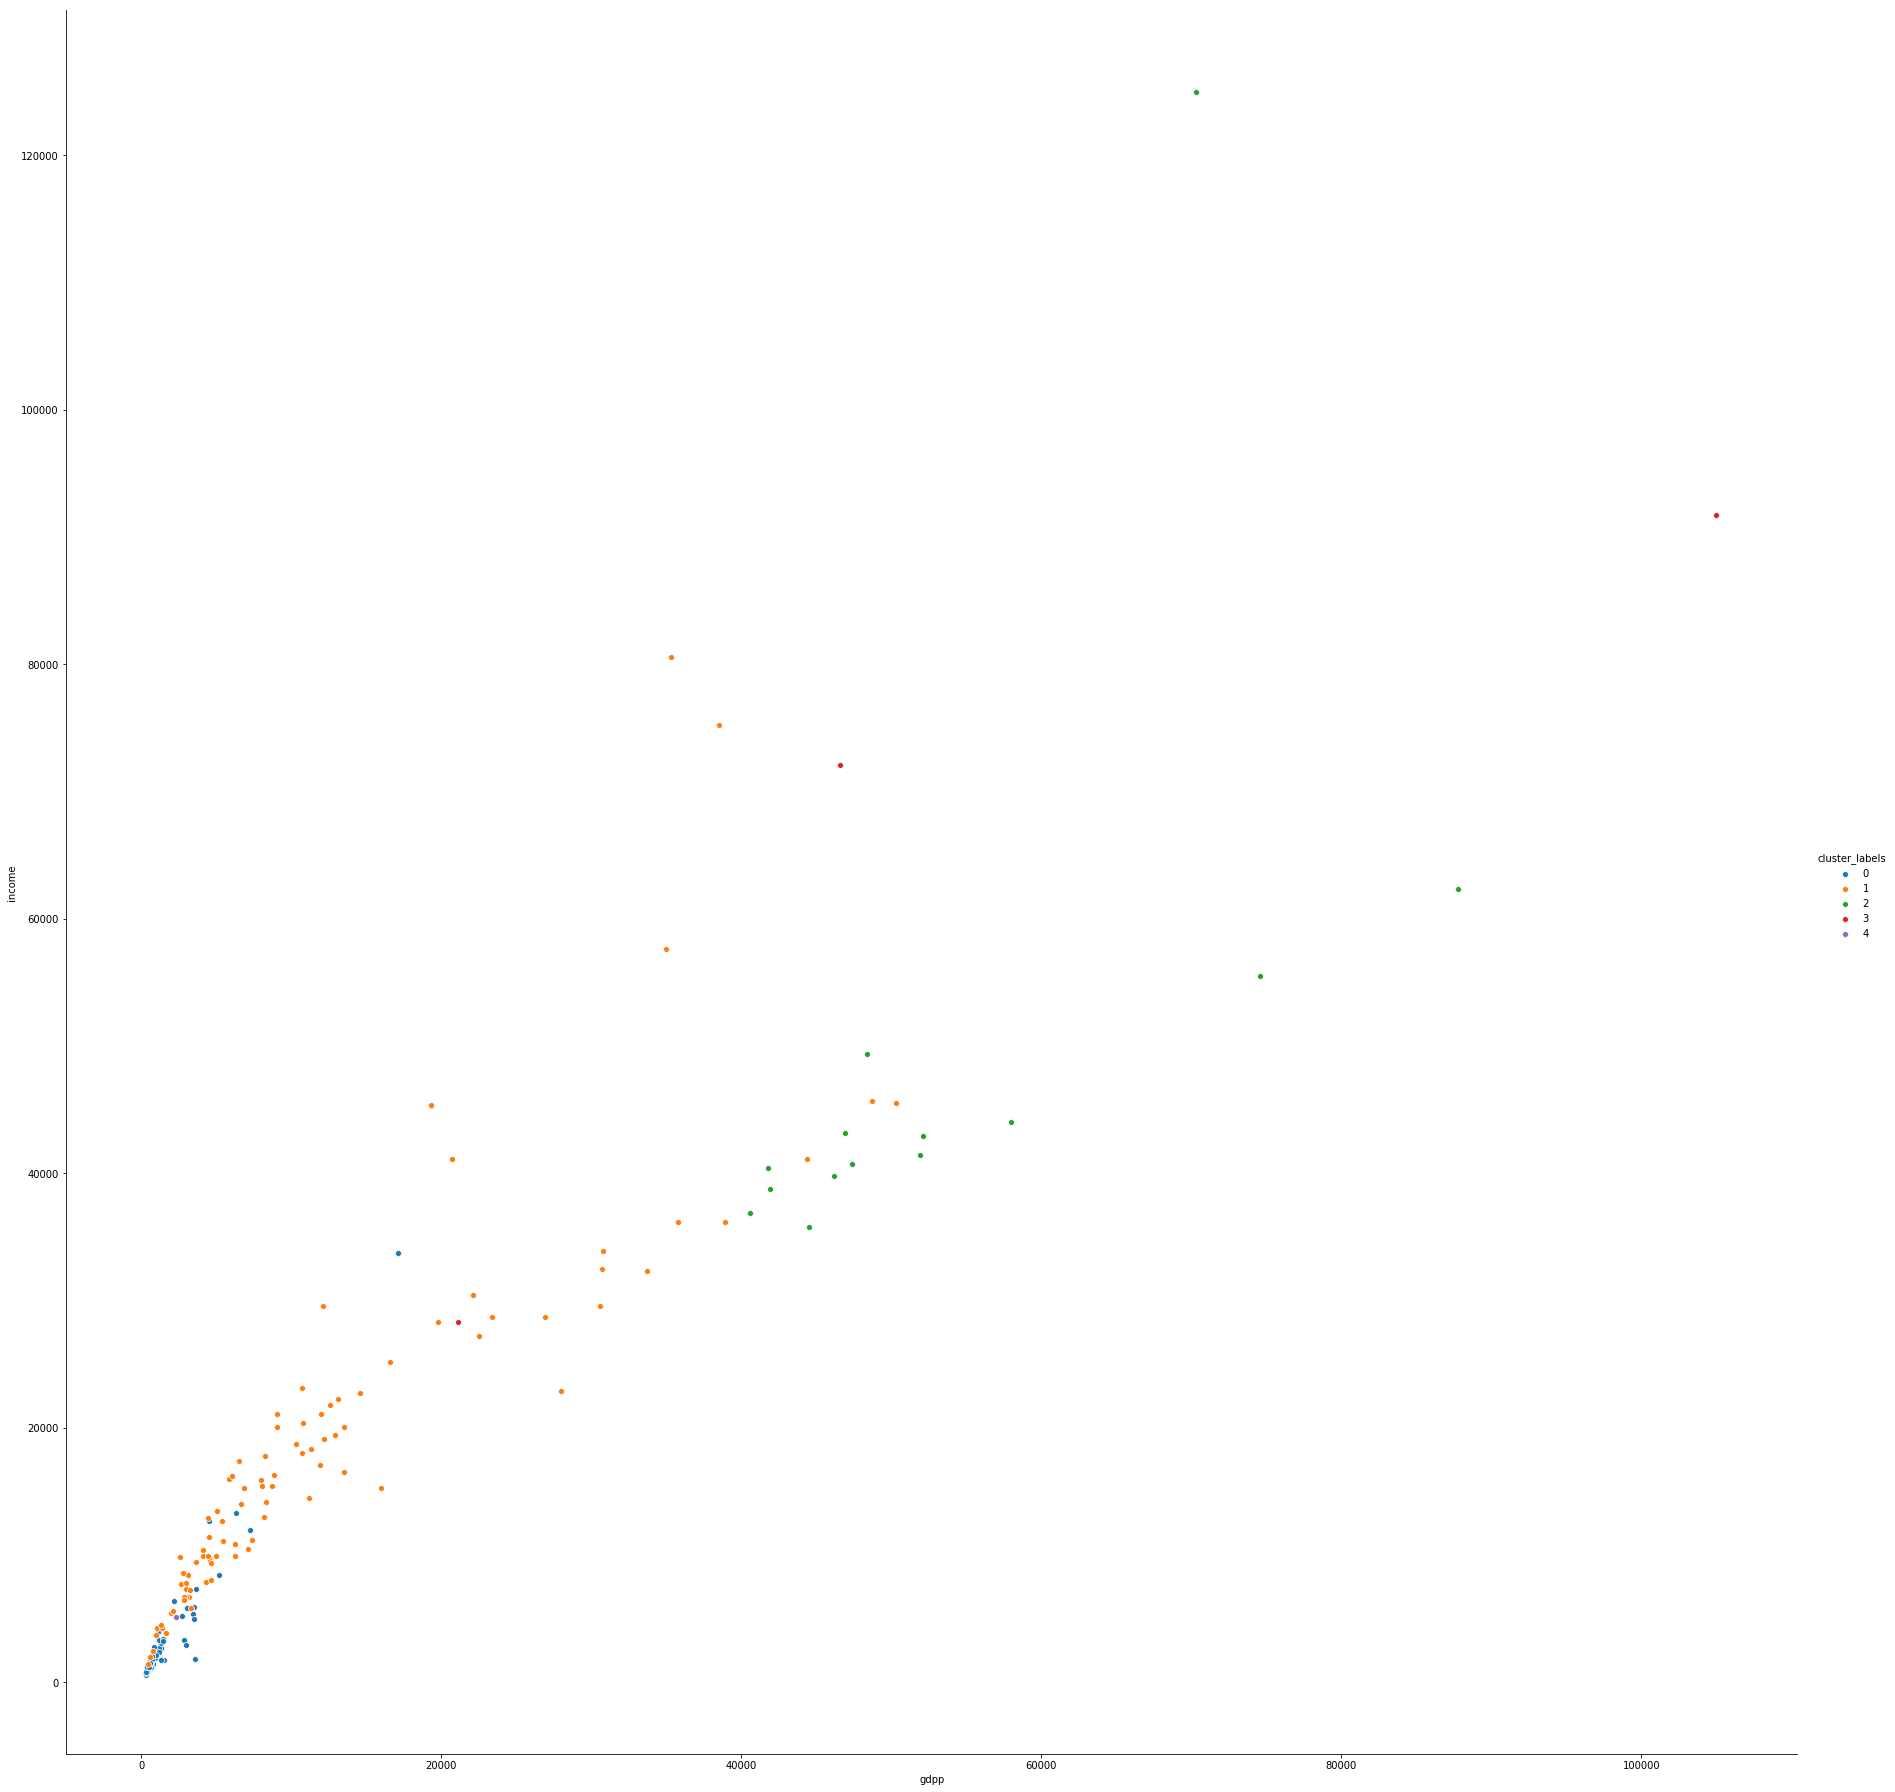

In [264]:
#plotting the gdpp and income  on X-Y axis.
sns.pairplot(data=Country, x_vars=["gdpp"], y_vars=["income"], hue = "cluster_labels",size=25)

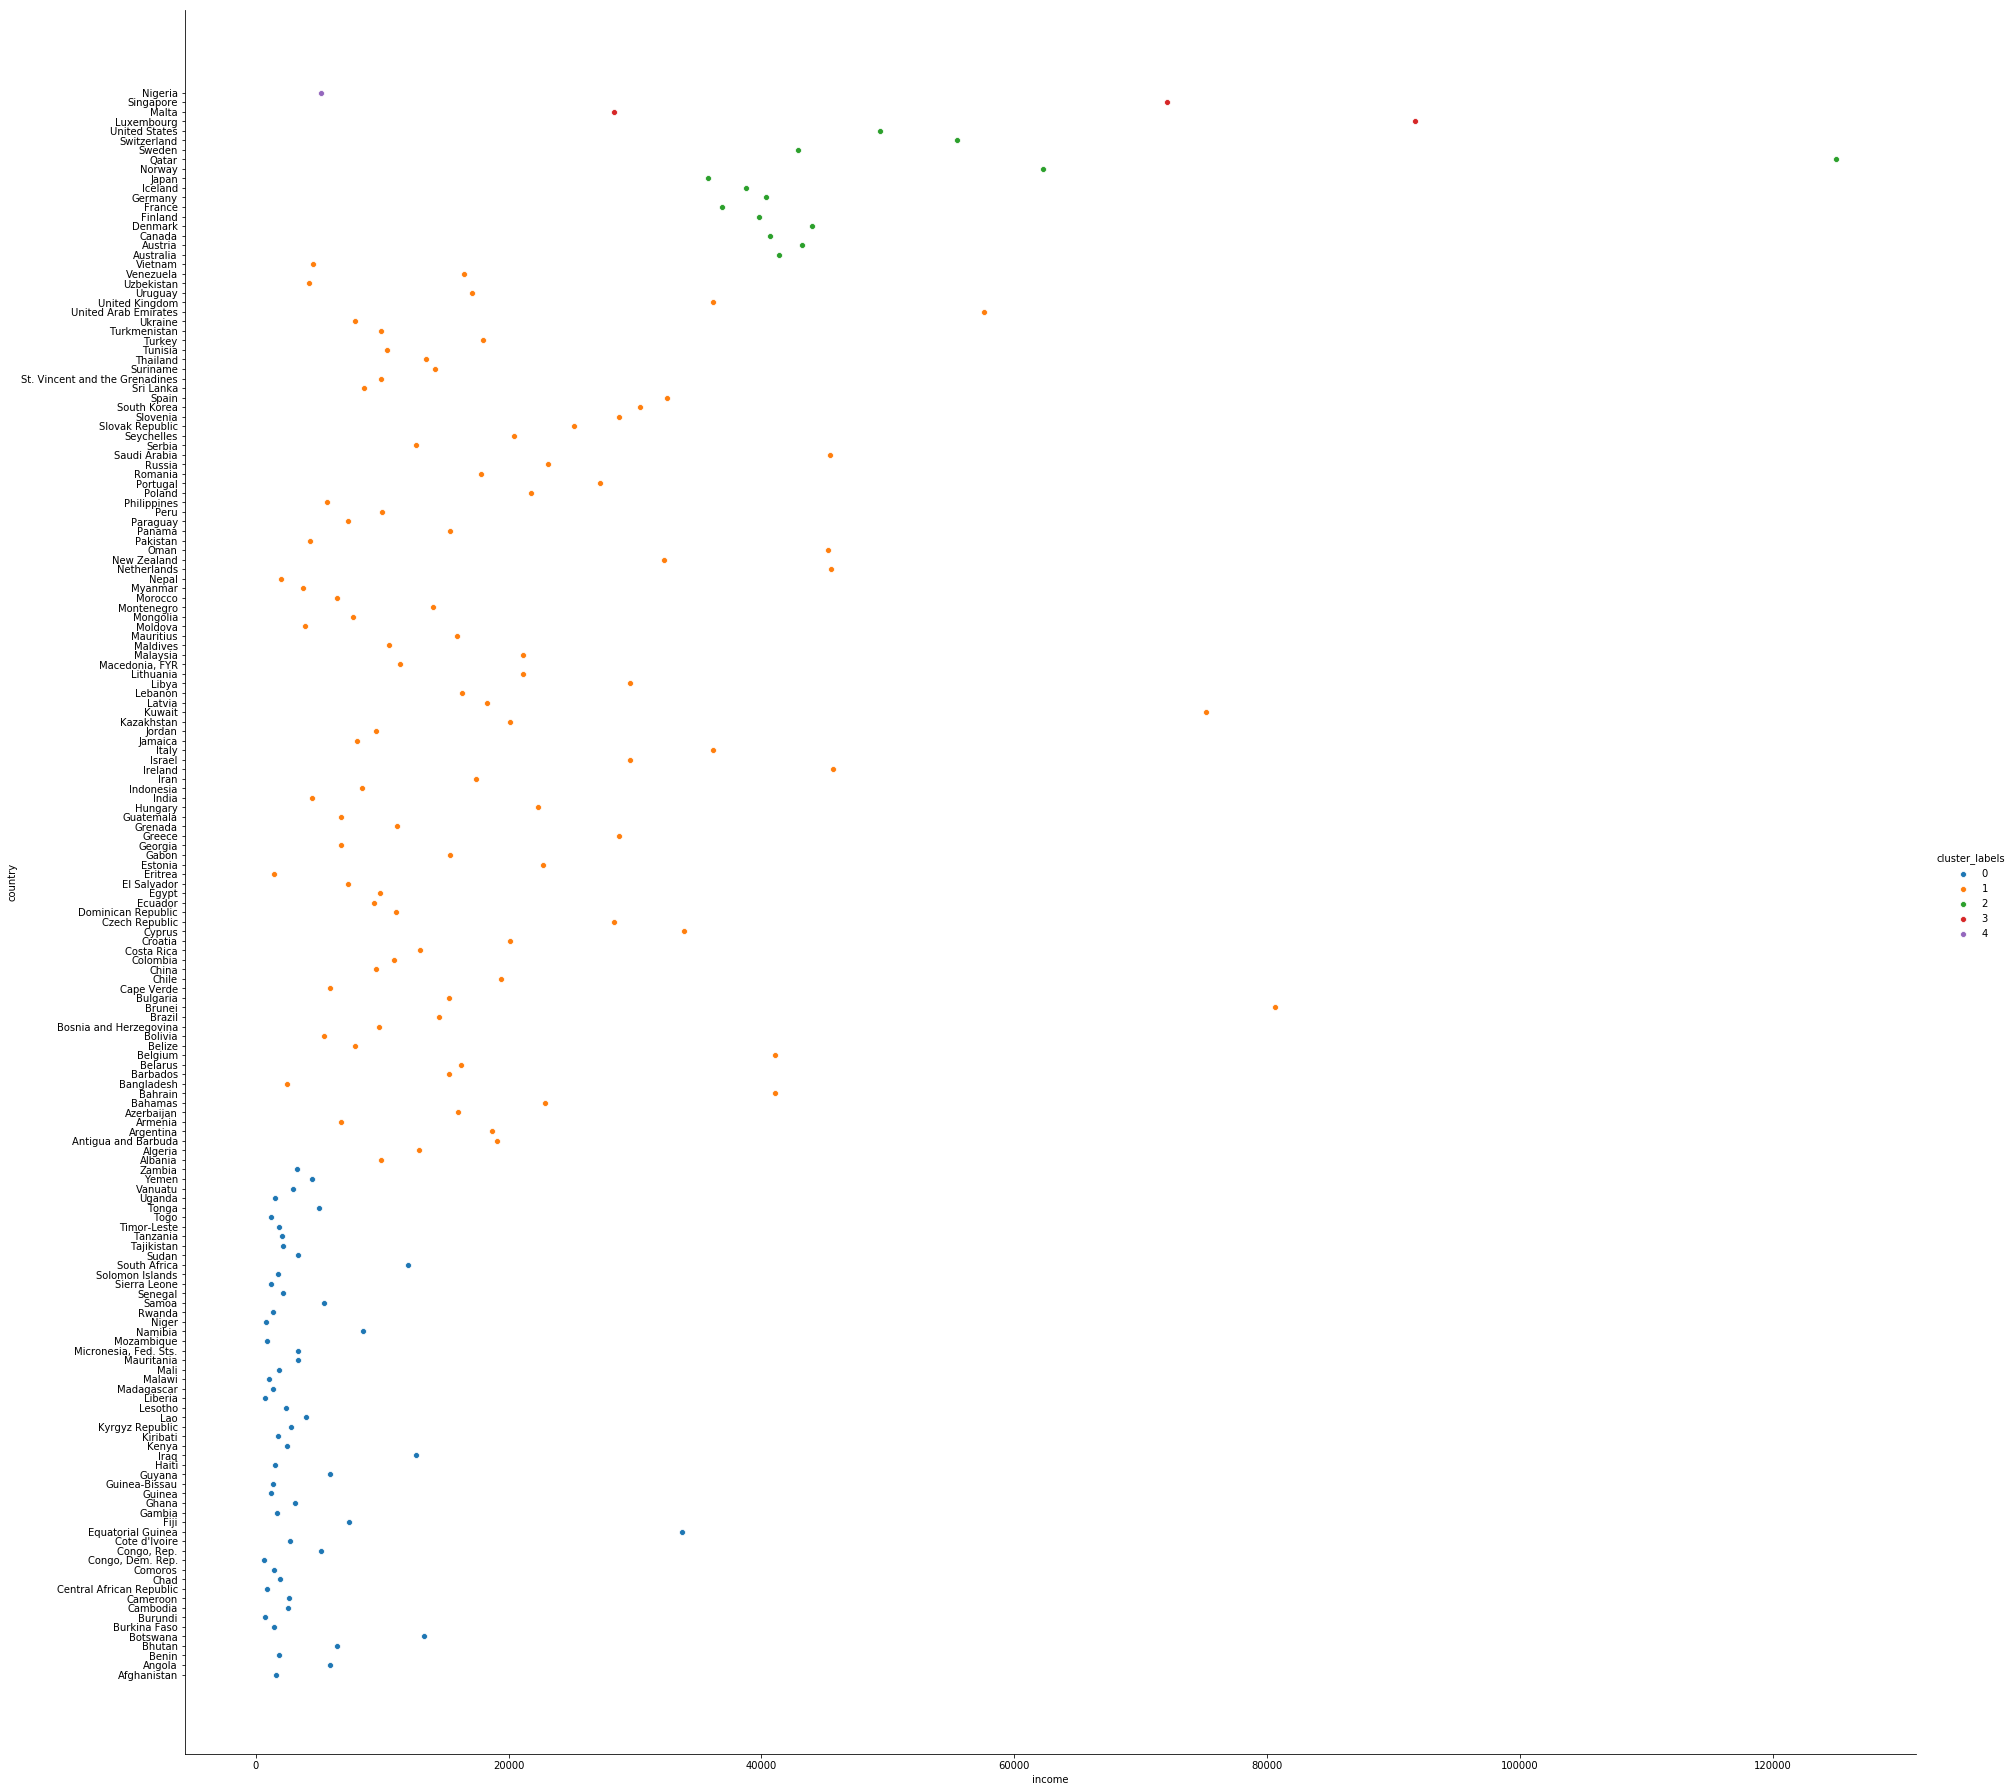

In [265]:
#plotting the income and country  on X-Y axis.
sns.pairplot(data=Country, x_vars=["income"], y_vars=["country"], hue = "cluster_labels",size=25)

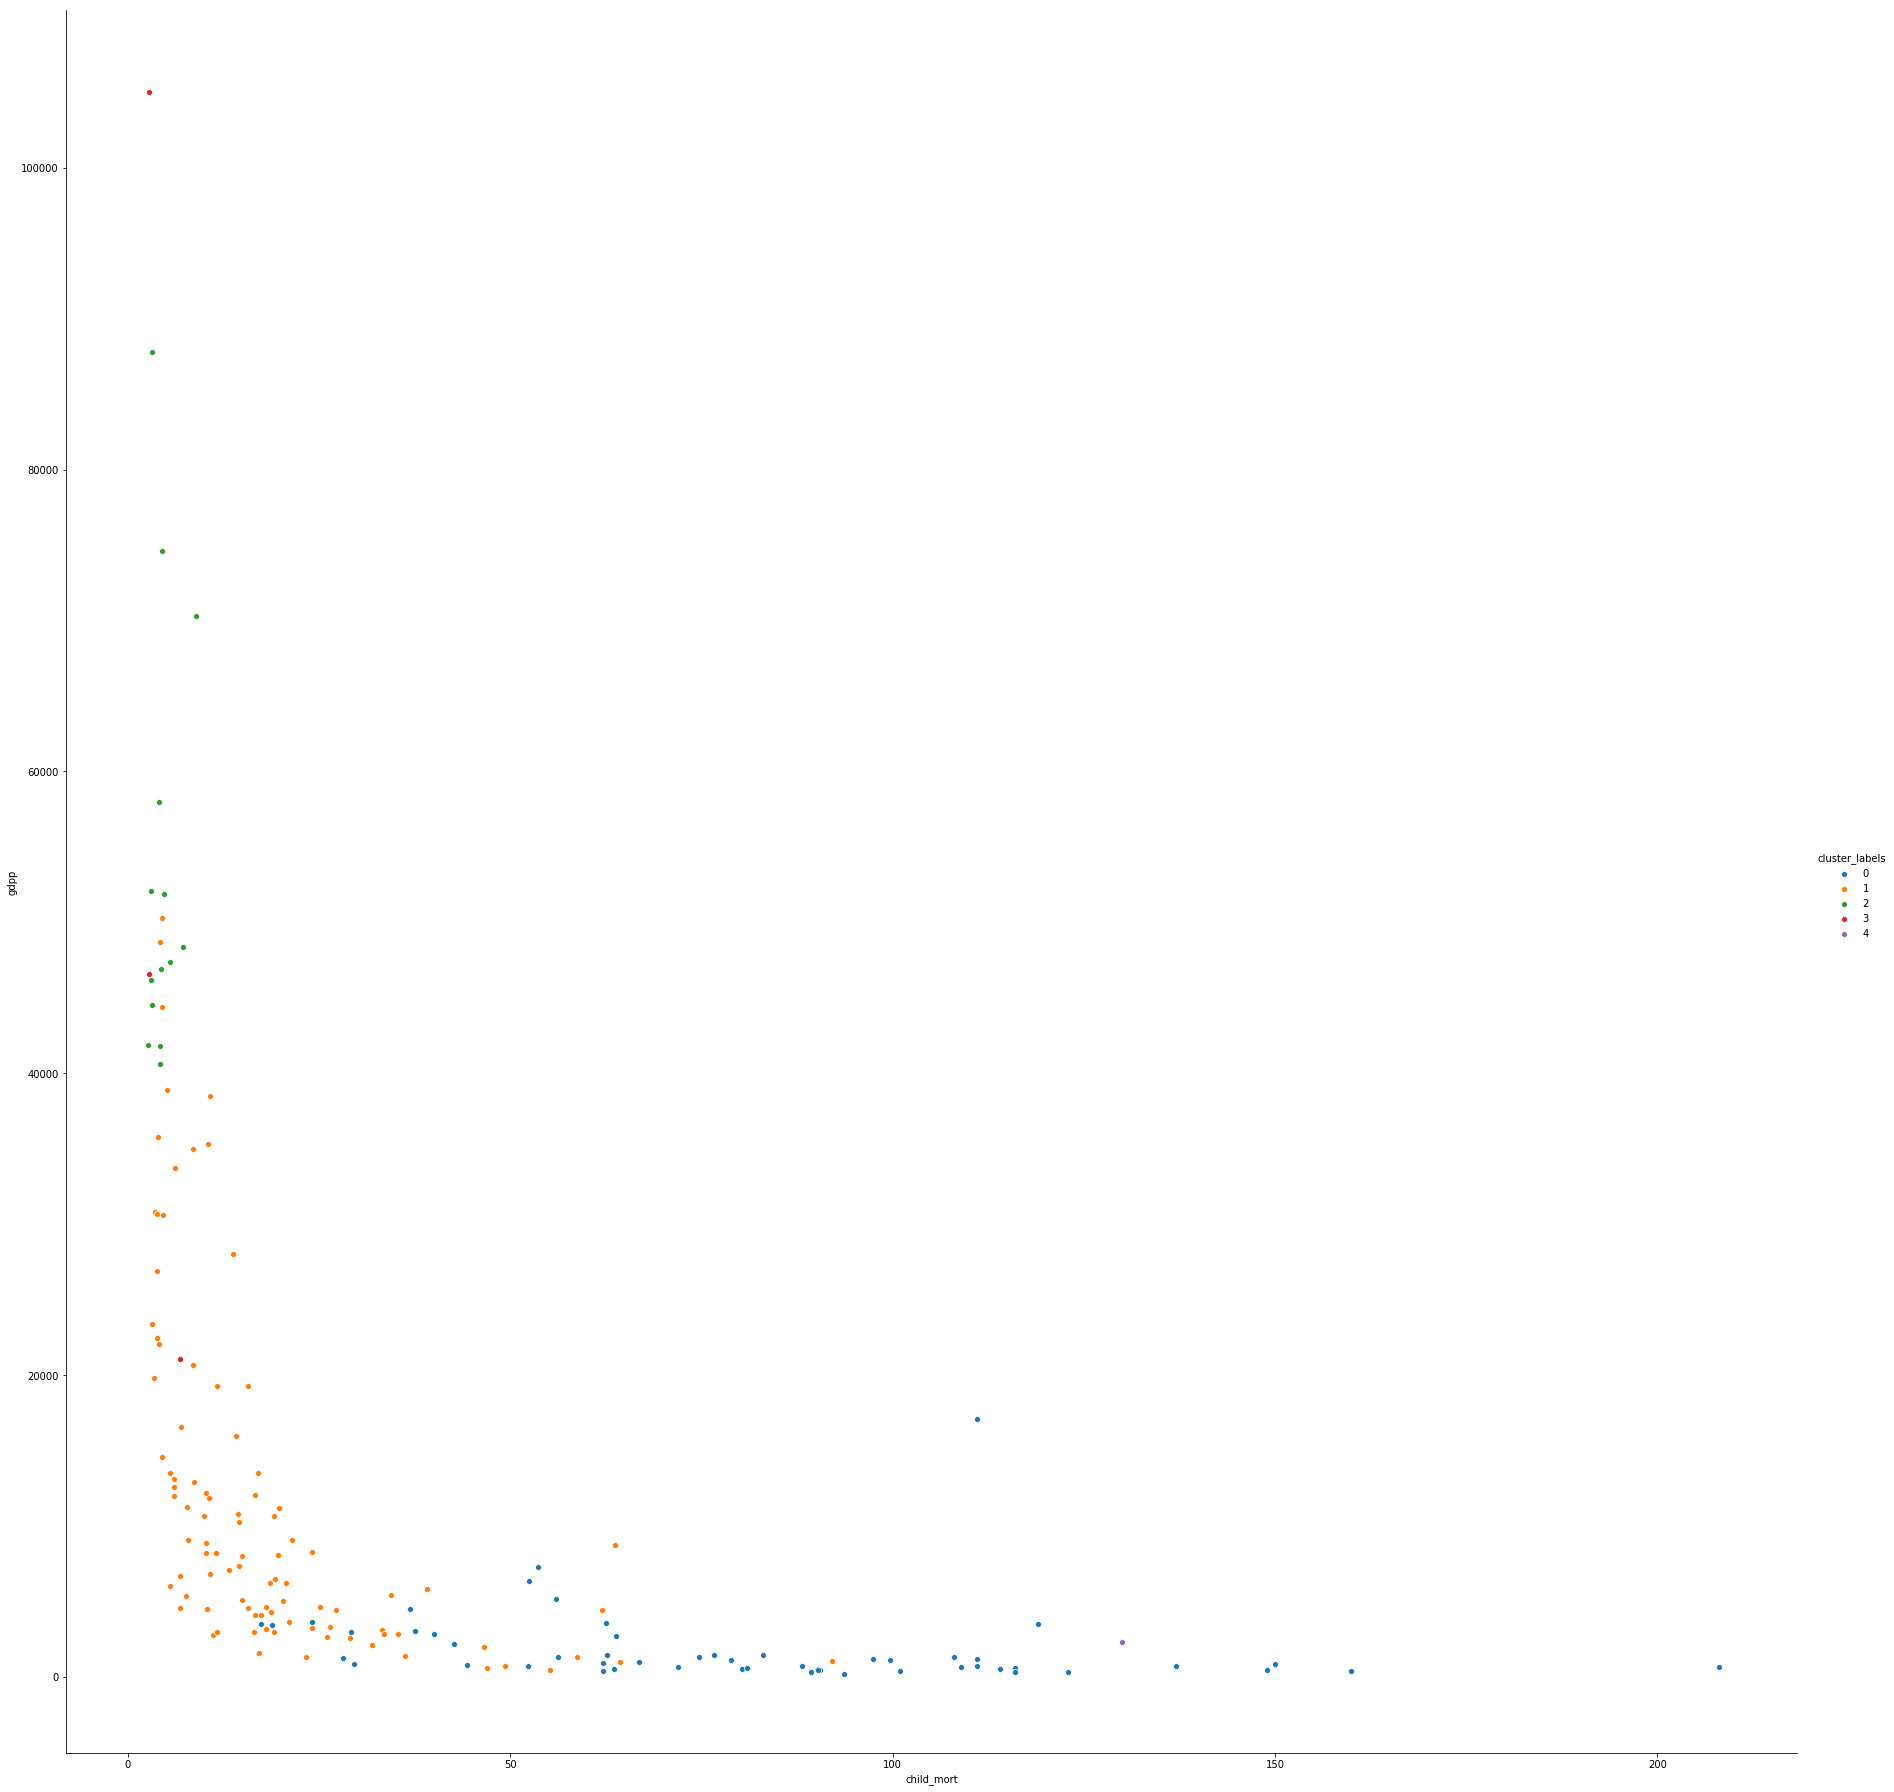

In [266]:
#plotting the child_mort and gdpp  on X-Y axis.
sns.pairplot(data=Country, x_vars=["child_mort"], y_vars=["gdpp"], hue = "cluster_labels",size=25)

# 6.Final analysis and reco

From both the K-Means and Hierarchical methods we have observed that cluster_0 need direct aid from NGO, So we will choose only those countries which are common in cluster_0 of both the methods.
We will make a new df "cluster_0_common" which conatins countries which are commom in both cluster_0

In [267]:
# create a new df "Cluster_0_common" which conatains countries having cluster_id = 0 and cluster_labels = 0
cluster_0_common=Country[(Country['cluster_id']==0)&(Country['cluster_labels']==0)]
cluster_0_common

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp, cluster_id, cluster_labels]
Index: []

In [268]:
# check the countries which need direct aid
cluster_0_common.country

Series([], Name: country, dtype: object)

# First 5 countries which need direct aid

Above we can see the countries  which need direct aid from NGO, we will select atleast 5 countries based on the 3 main main values such as gdpp, income and child_mort. So finally we will select the countries given below:

1.Cambodia
2.Kyrgyz Republic
3.Tajikistan
4.Solomon islands
5.Bhutan